In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns

# Some plotting config
sns.set(
    context="notebook",
    # style="ticks",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.75,
)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
# plt.rcParams["xtick.top"] = True
# plt.rcParams["ytick.right"] = True
# plt.rcParams["xtick.bottom"] = True
# plt.rcParams["ytick.left"] = True
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({"text.usetex": False})


import fitter
import fitter.visualize as viz

In [2]:
obs = fitter.Observations("NGC0104")

In [3]:
mcmcviz = viz.MCMCVisualizer("./47_tuc_binaries/NGC0104_sampler.hdf", obs)

In [4]:
civiz = mcmcviz.get_CImodel(Nprocesses=6,N=512)

/home/peter/research/GCfit/fitter/probabilities/pulsars.py:445: RuntimeWarning: invalid value encountered in log10
  Pdot_int = np.log10(Pdot_int)
/home/peter/research/GCfit/fitter/probabilities/mass.py:126: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.polygon = ops.unary_union([geom.Polygon(c).buffer(0)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)
/home/peter/research/GCfit/fitter/probabilities/mass.py:91: ShapelyDeprecationWarning: Iteration over multi-part geometries

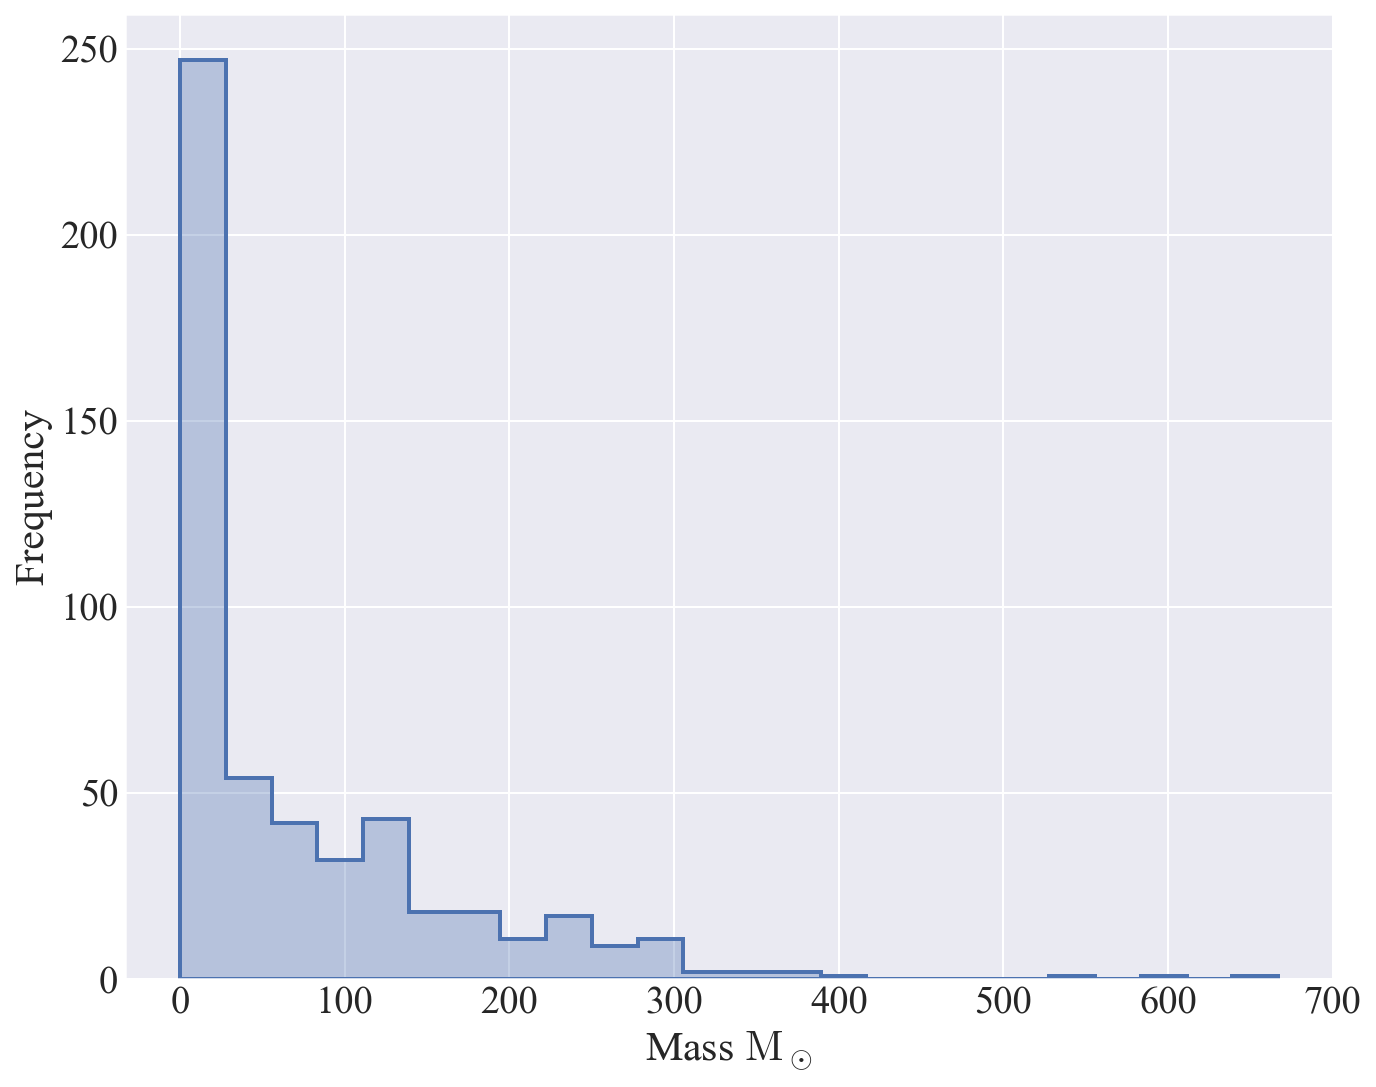

In [29]:
# plot BH Mass
fig = plt.figure(figsize=(10,8))
civiz.plot_BH_mass(fig=fig)
plt.xlabel("Mass $\mathrm{M}_\odot$")
plt.ylabel("Frequency")
fig.tight_layout()
fig.savefig('BH_mass.png', bbox_inches='tight', dpi=300)

plt.show()

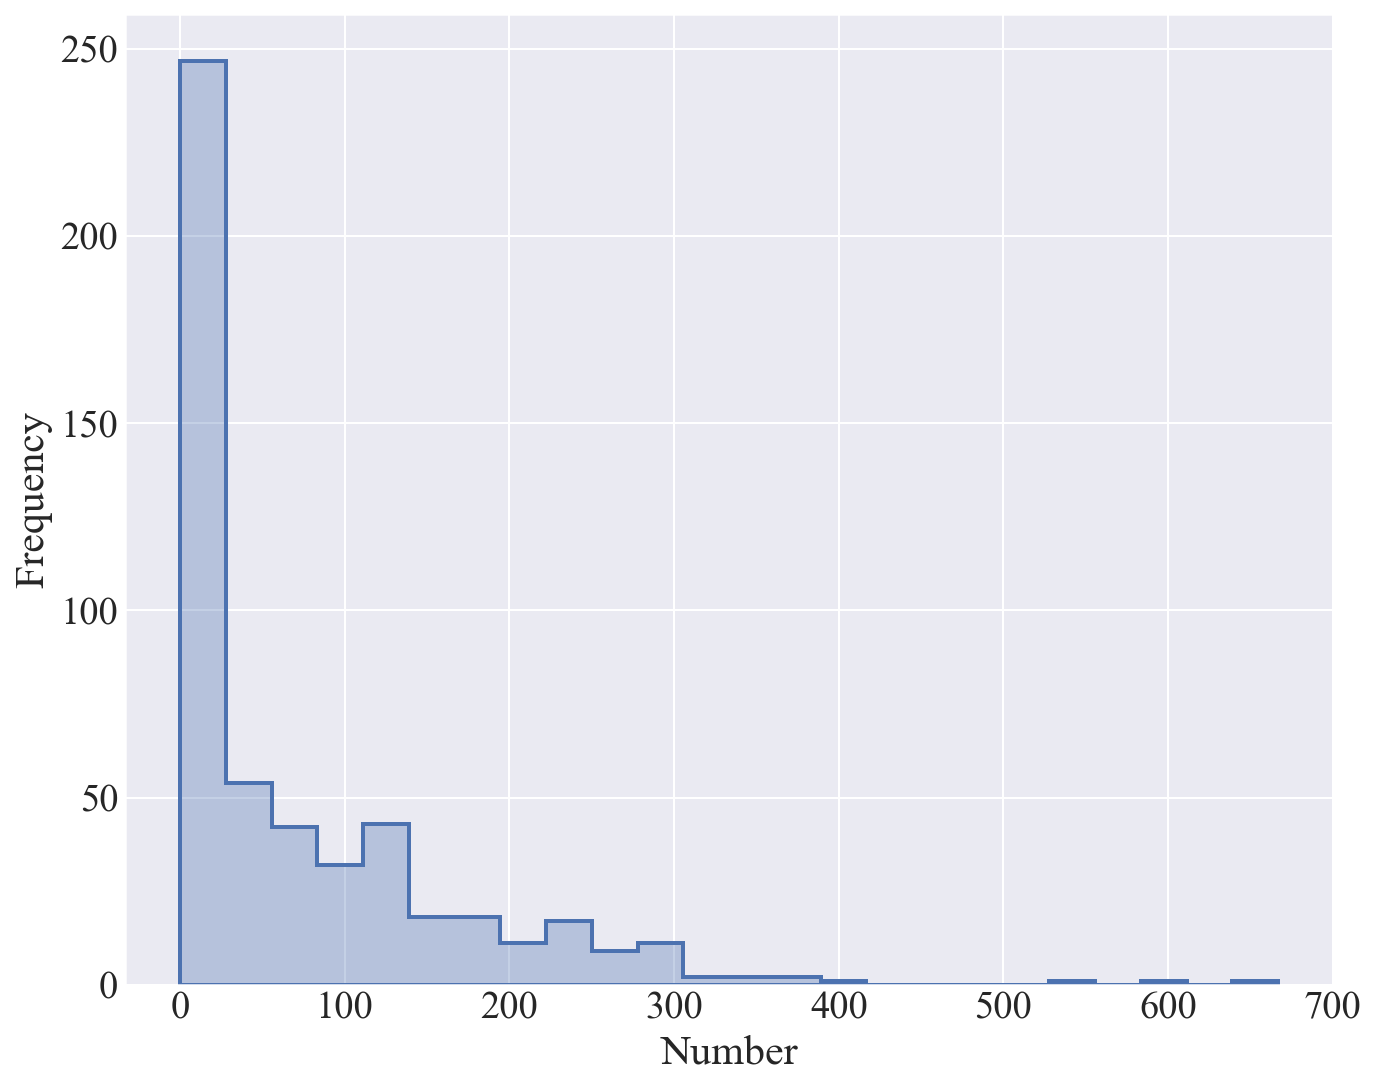

In [30]:
# plot Number
fig = plt.figure(figsize=(10,8))
civiz.plot_BH_mass(fig=fig)
plt.xlabel("Number")
plt.ylabel("Frequency")
fig.tight_layout()
fig.savefig('BH_num.png', bbox_inches='tight', dpi=300)

plt.show()

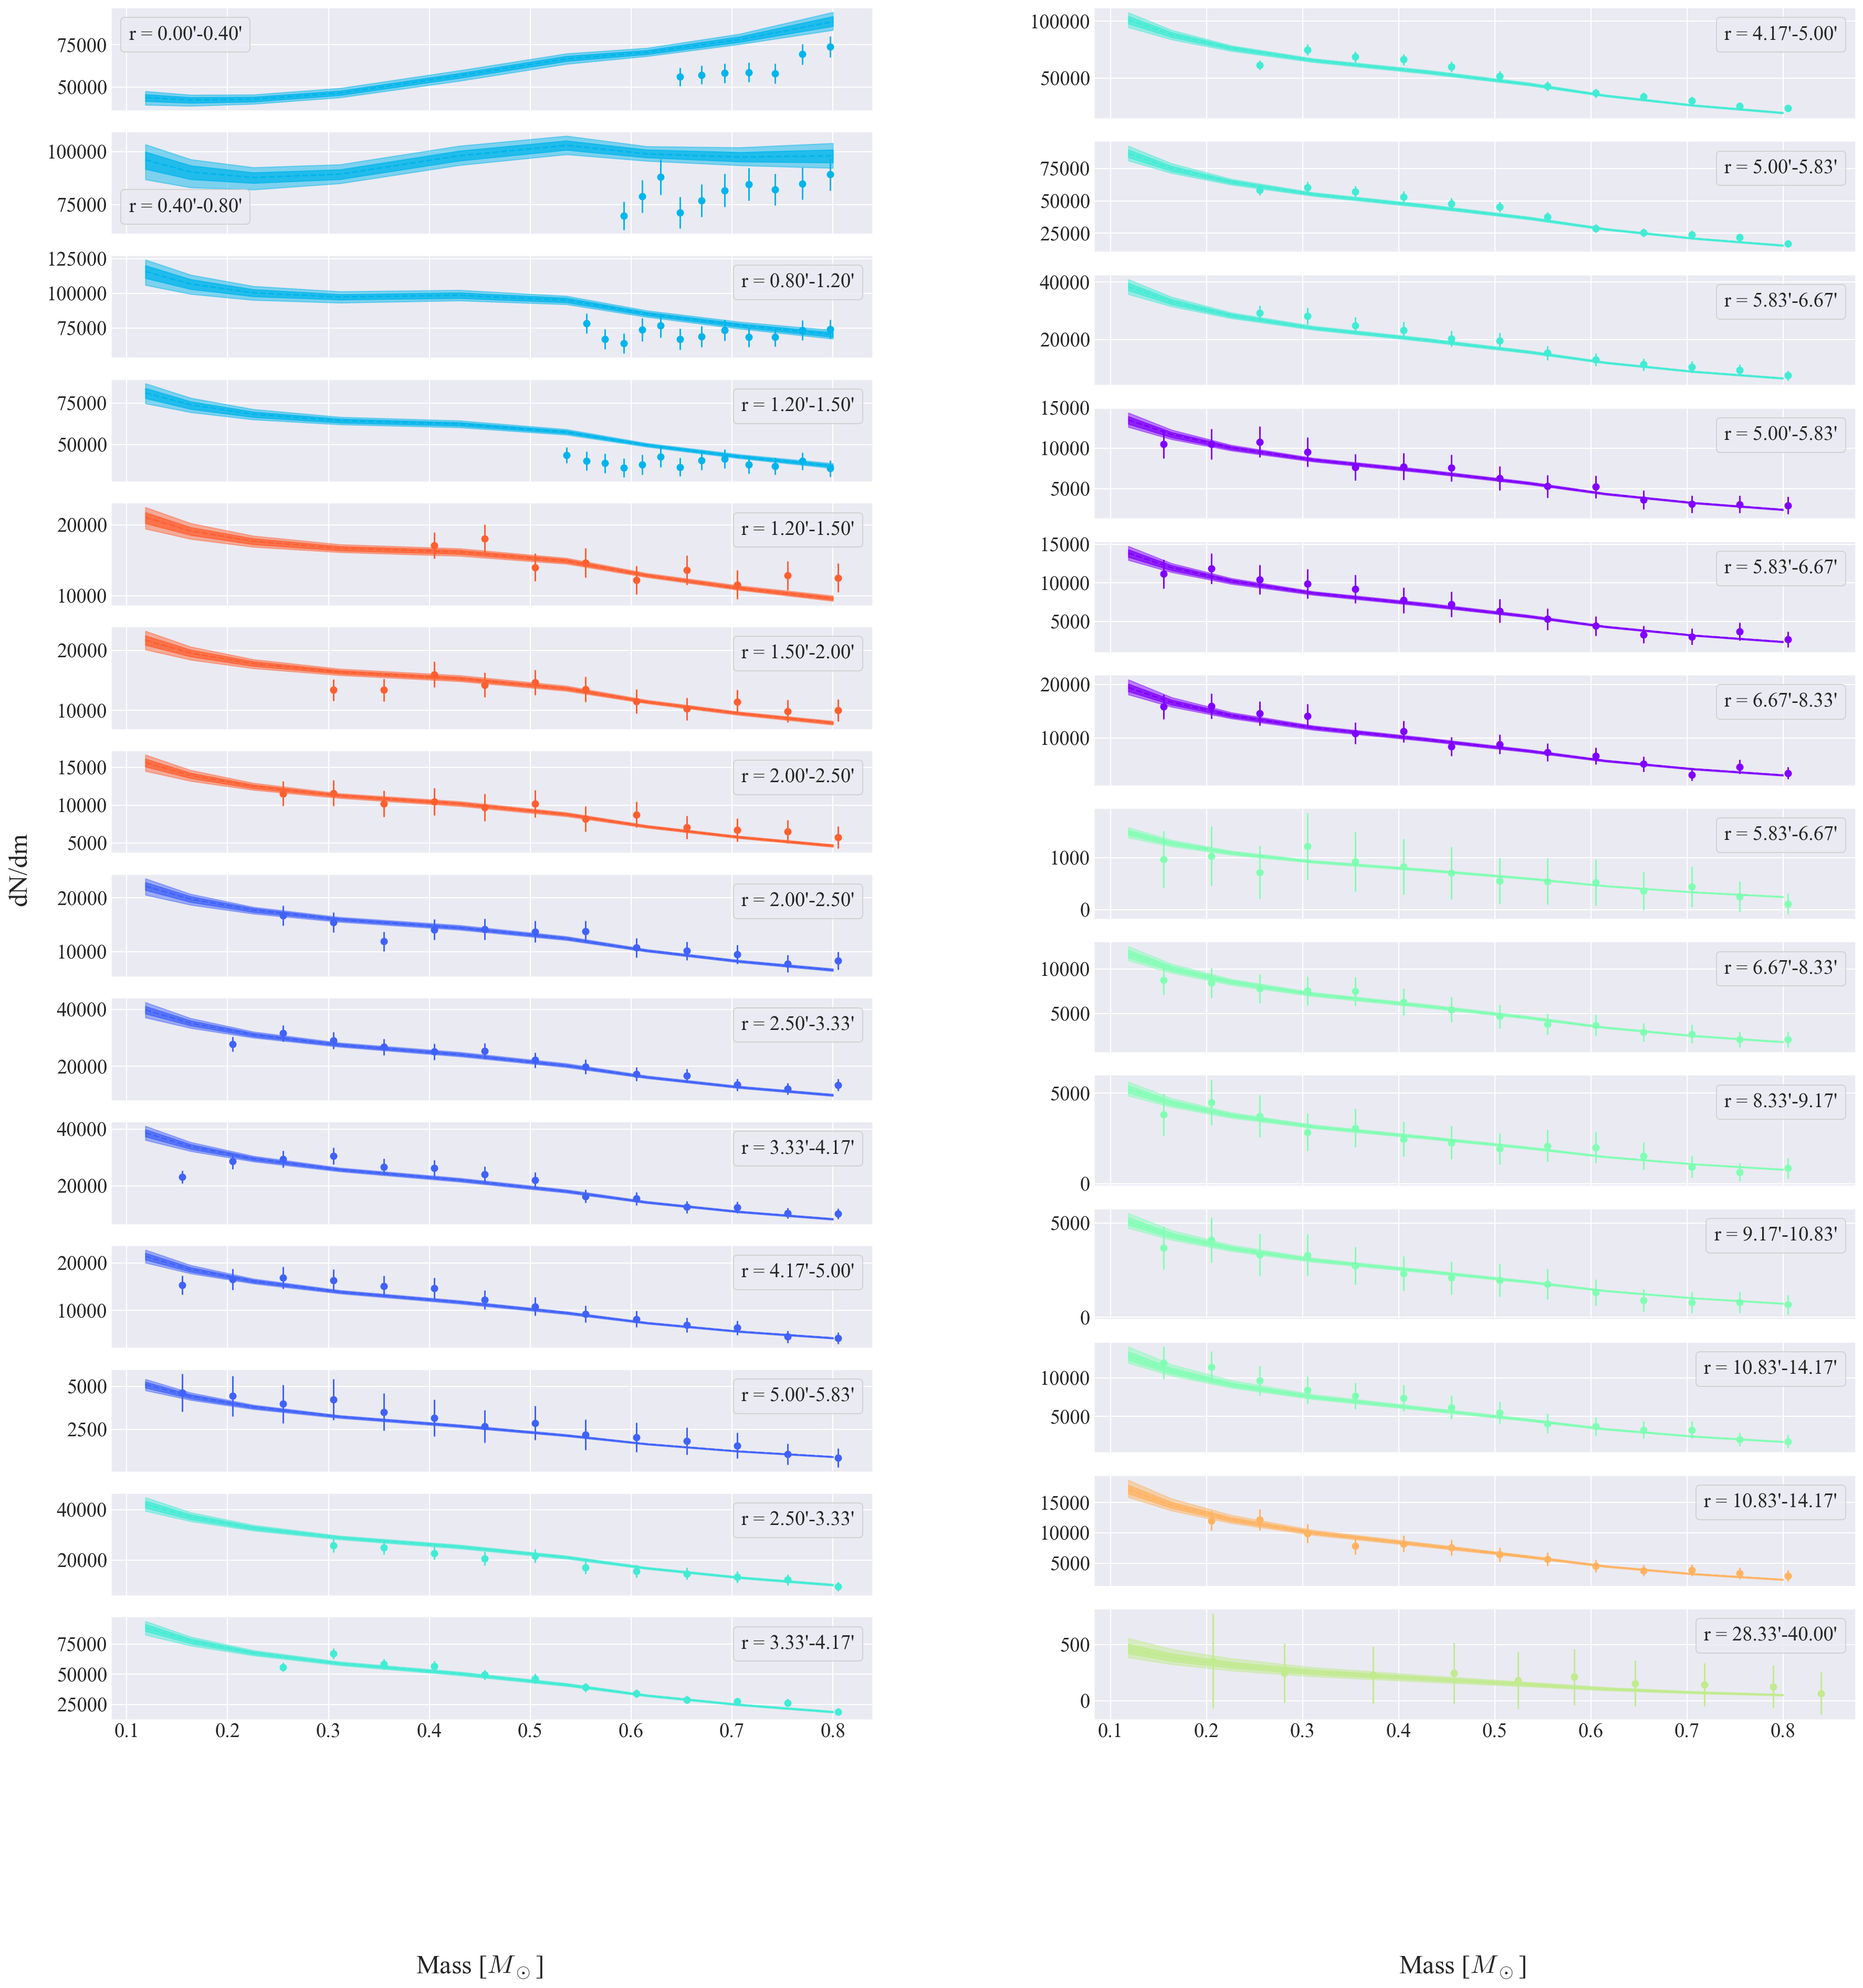

In [31]:
# plot mass function
fig = plt.figure(figsize=(26,30))
civiz.plot_mass_func(fig=fig)
# for a in fig.axes:
#     a.set_yscale("log")
#     a.set_xscale("log")
fig.savefig('mass_fun.png', bbox_inches='tight', dpi=300)
plt.show()

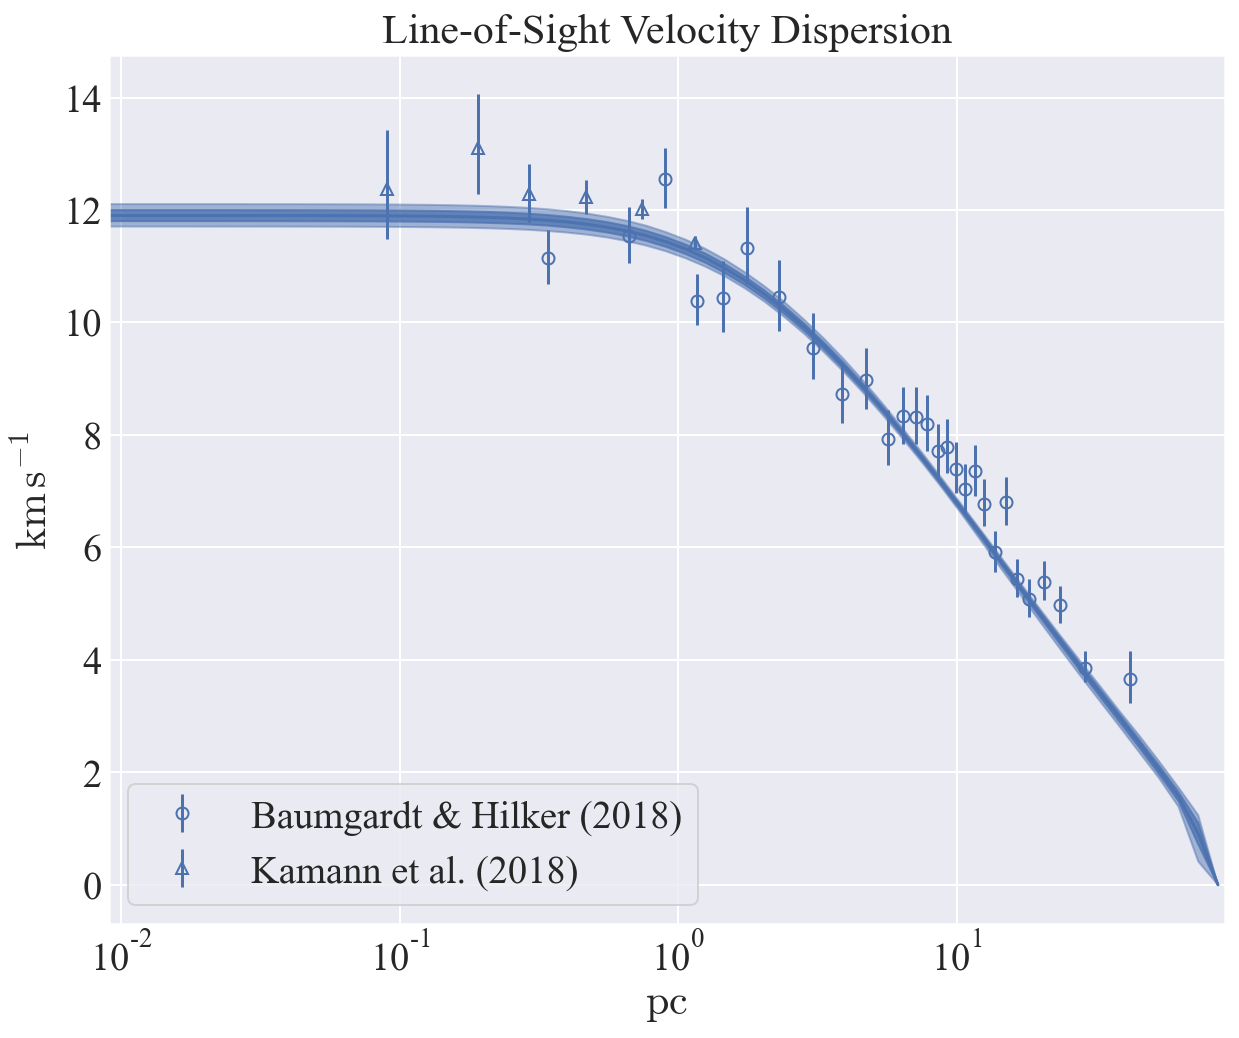

In [32]:
# plot los vdisp
fig = plt.figure(figsize=(10,8))
civiz.plot_LOS(fig=fig)
fig.savefig('LOS_veldisp.png', bbox_inches='tight', dpi=300)
plt.show()

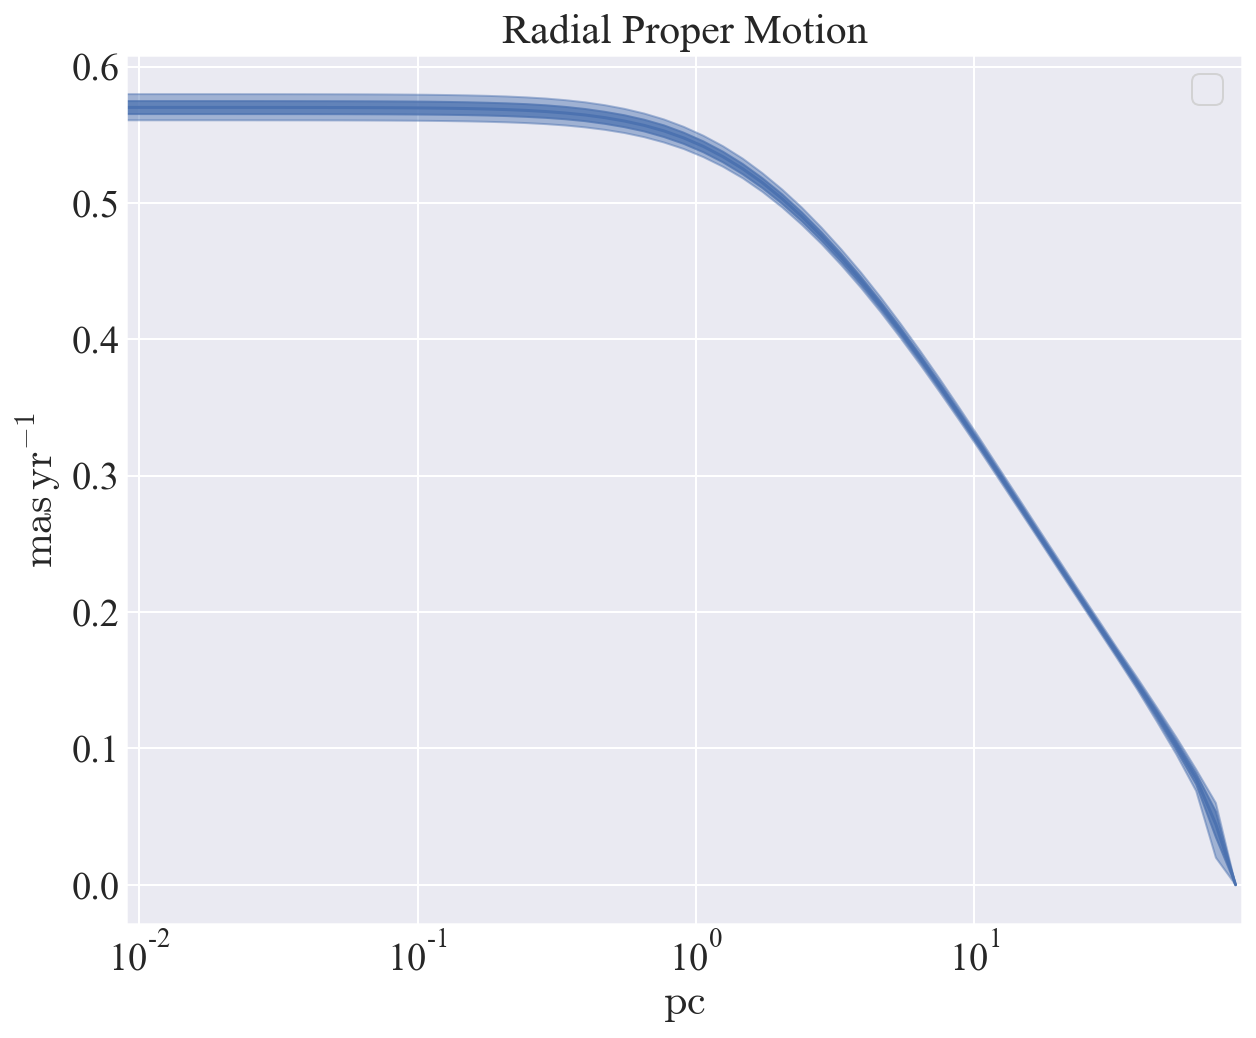

In [33]:
# plot pm R
fig = plt.figure(figsize=(10,8))
civiz.plot_pm_R(fig=fig)
fig.savefig('PM_r.png', bbox_inches='tight', dpi=300)
plt.show()

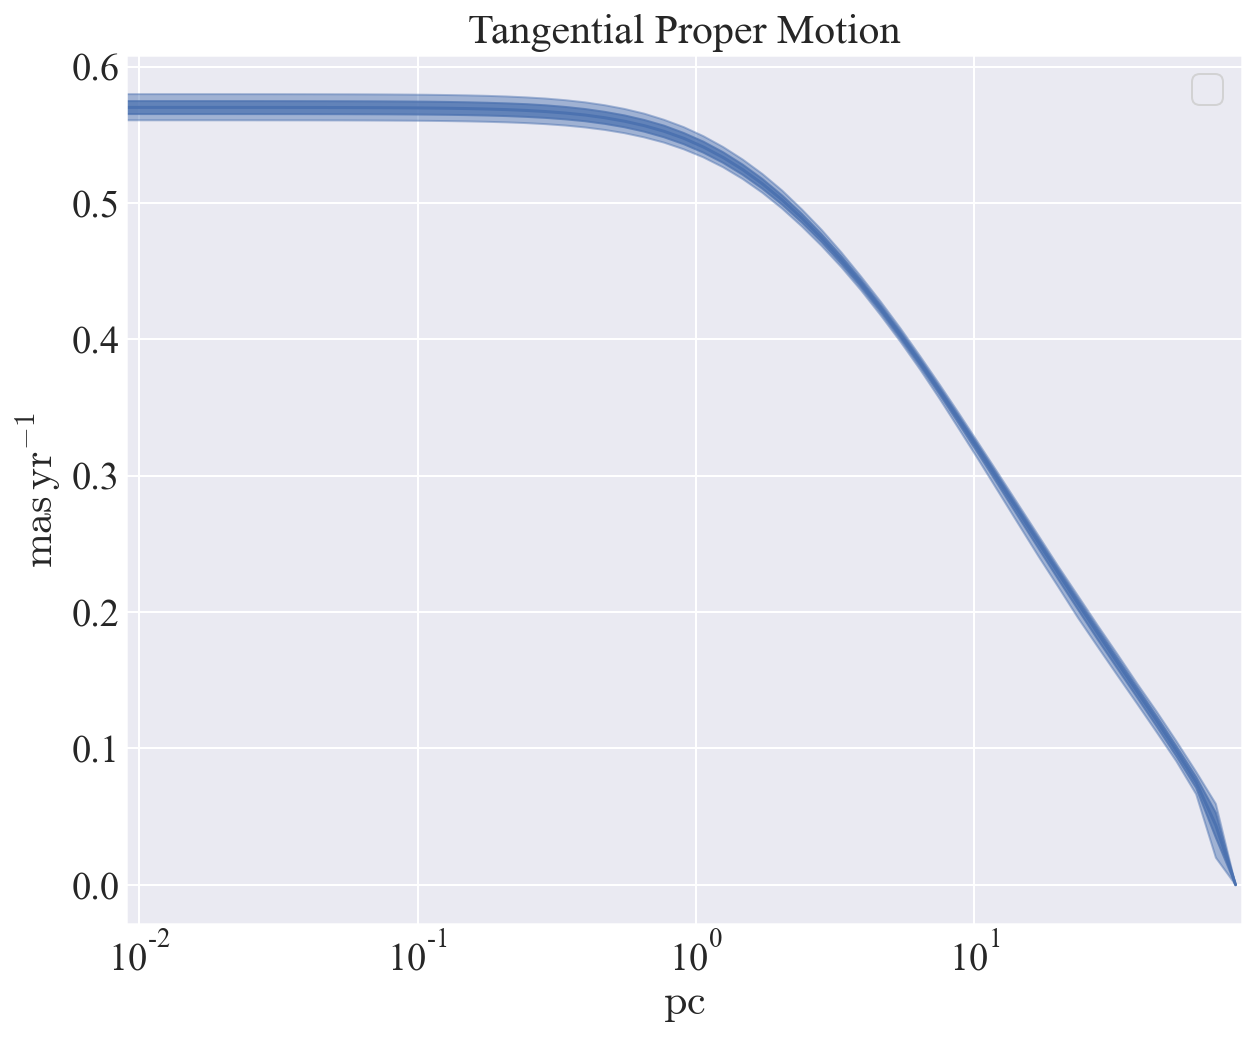

In [34]:
# plot pm T
fig = plt.figure(figsize=(10,8))
civiz.plot_pm_T(fig=fig)
fig.savefig('PM_t.png', bbox_inches='tight', dpi=300)

plt.show()

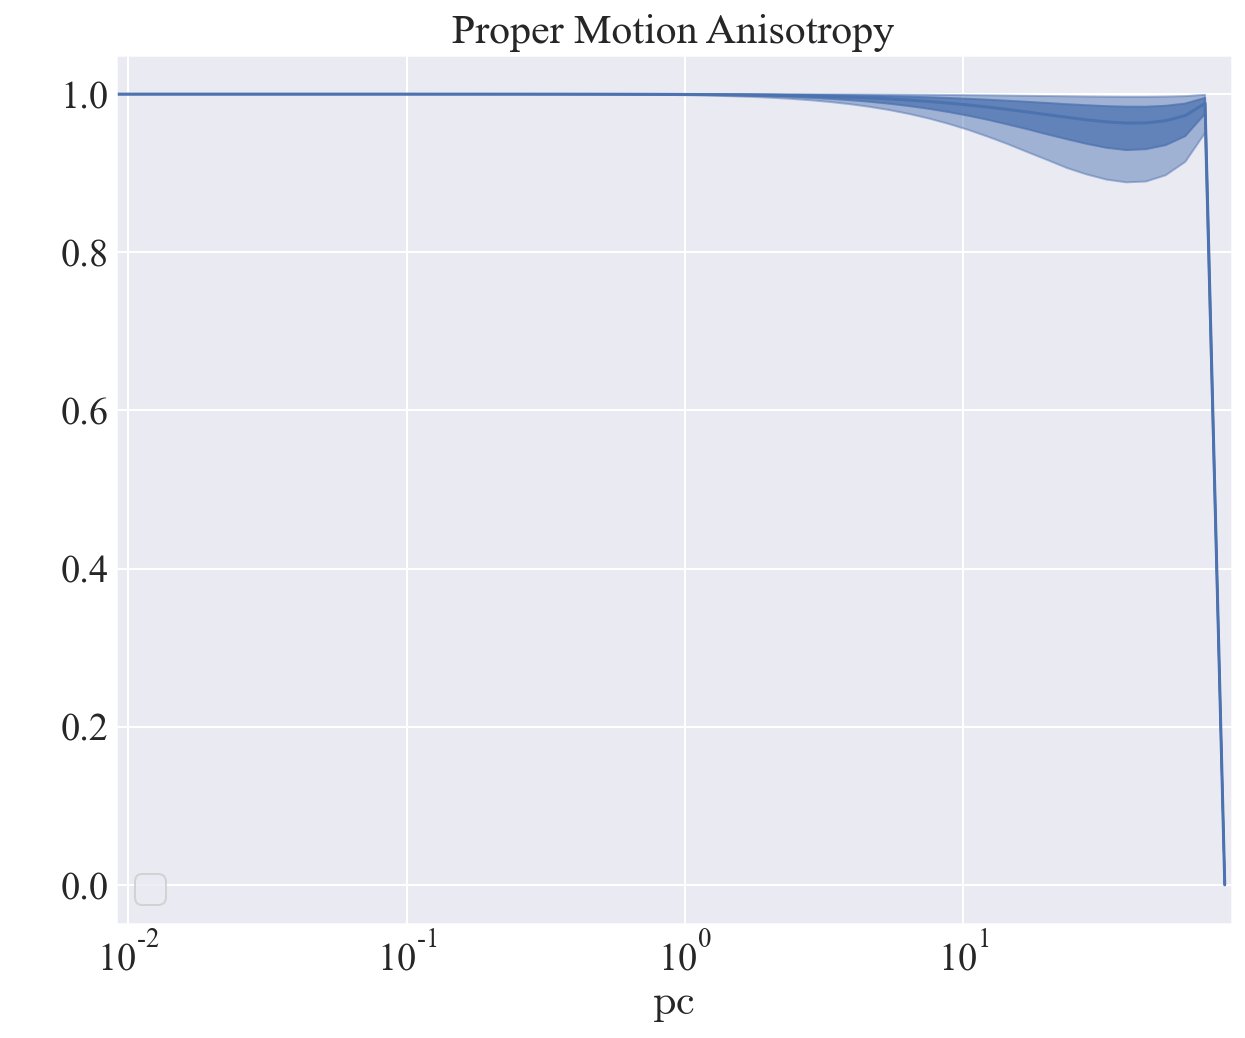

In [35]:
# plot pm ratio
fig = plt.figure(figsize=(10,8))
civiz.plot_pm_ratio(fig=fig)
fig.savefig('PM_ratio.png', bbox_inches='tight', dpi=300)
plt.show()

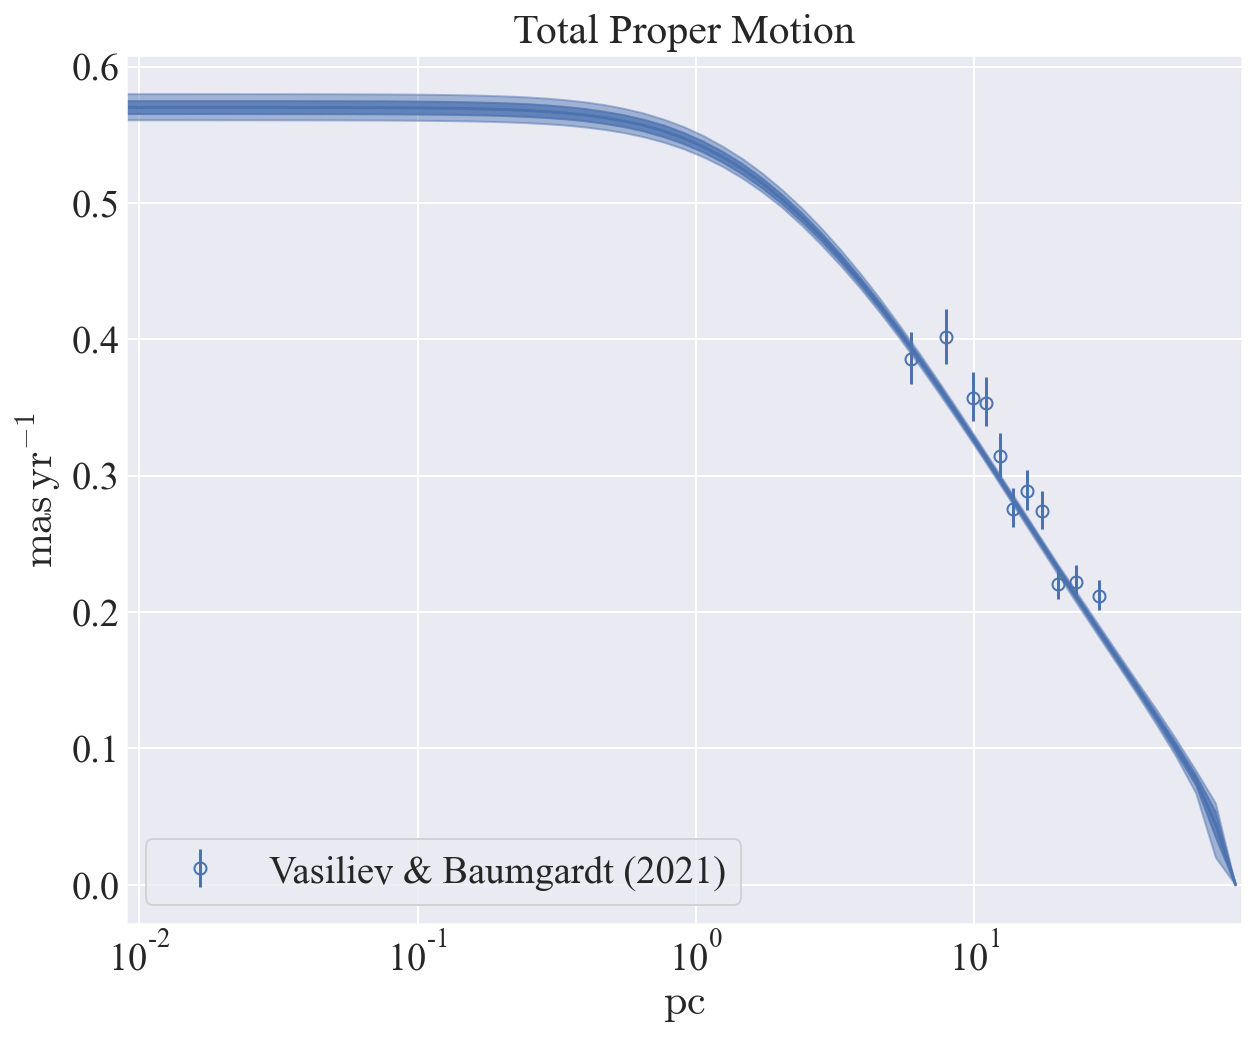

In [36]:
# plot pm total
fig = plt.figure(figsize=(10,8))
civiz.plot_pm_tot(fig=fig)
fig.savefig('PM_tot.png', bbox_inches='tight', dpi=300)
plt.show()

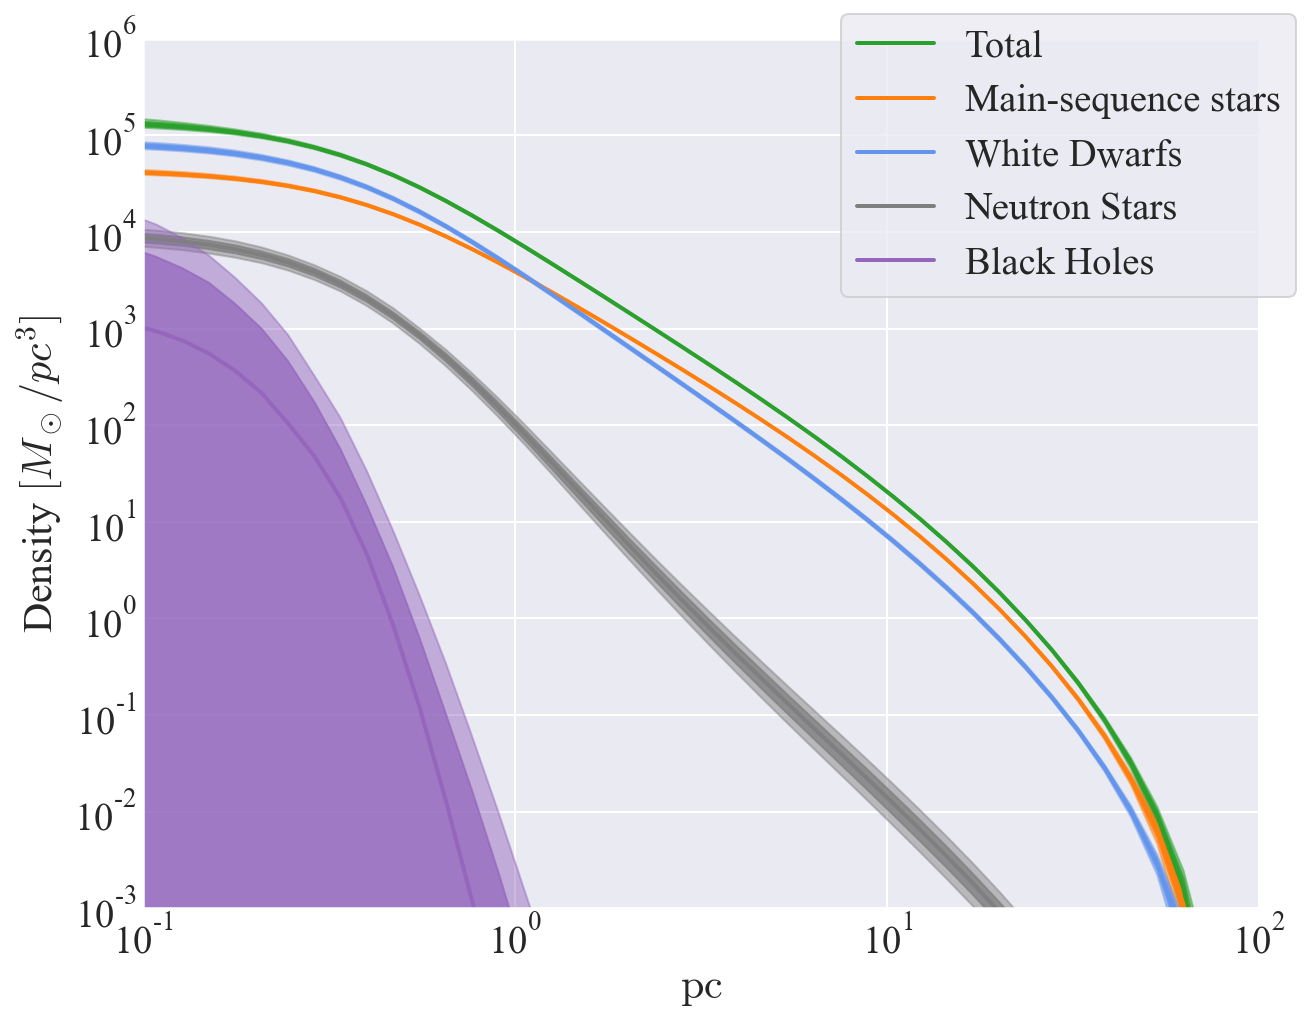

In [37]:
# plot density
fig = plt.figure(figsize=(10,8))
civiz.plot_density(fig=fig,)

plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
fig.legends = []

plt.xlim(1e-1,1e2)
plt.ylim(1e-3,1e6)

fig.savefig('density.png', bbox_inches='tight', dpi=300)


plt.show()

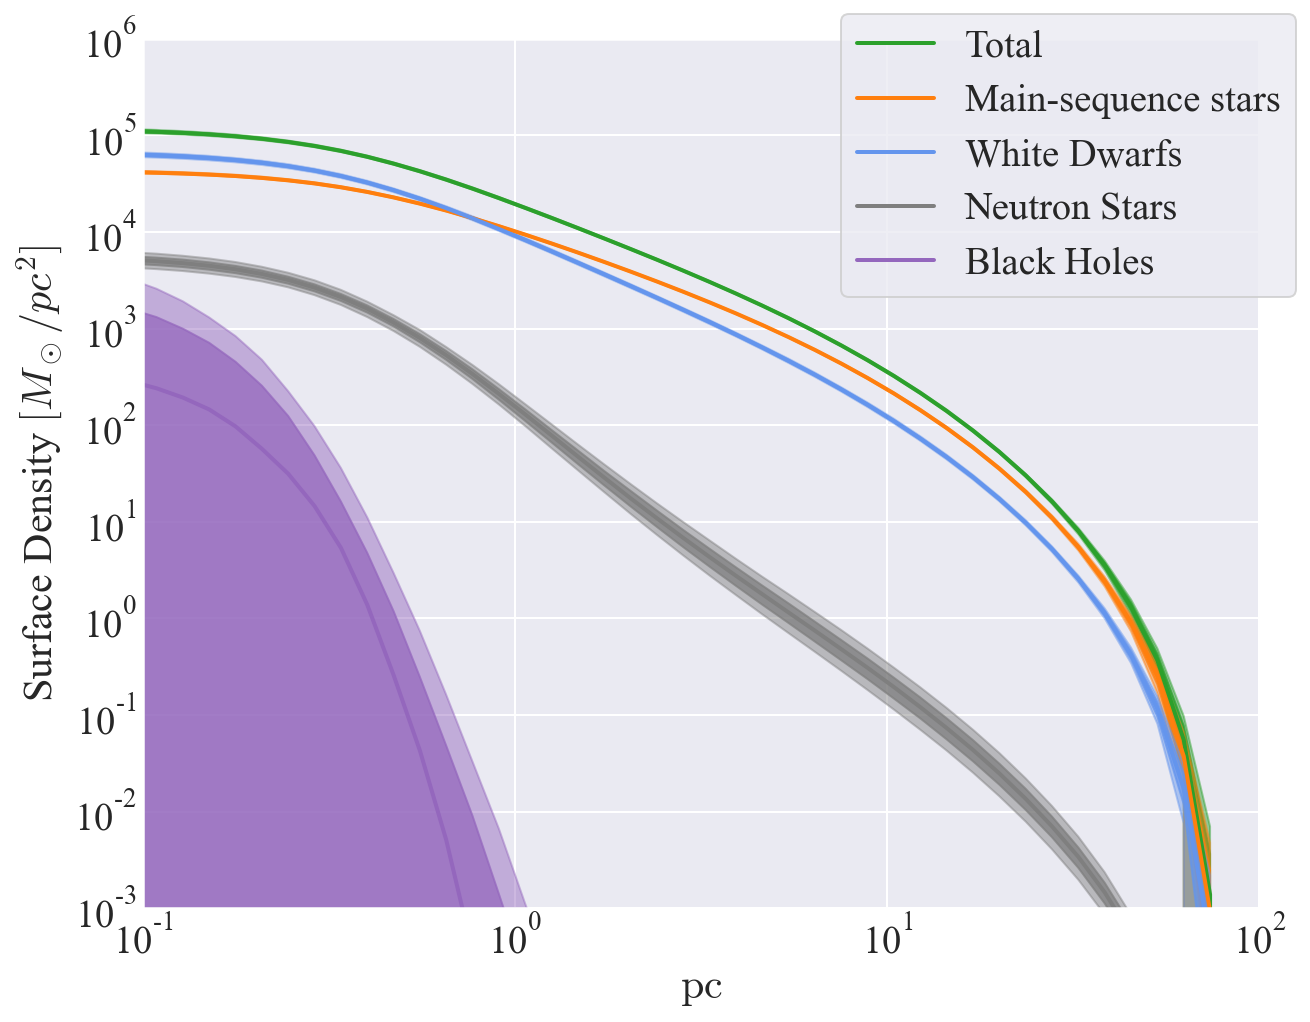

In [38]:
# plot surface density
fig = plt.figure(figsize=(10,8))
civiz.plot_surface_density(fig=fig,)

plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
fig.legends = []

plt.xlim(1e-1,1e2)
plt.ylim(1e-3,1e6)

fig.savefig('surface_dens.png', bbox_inches='tight', dpi=300)


plt.show()

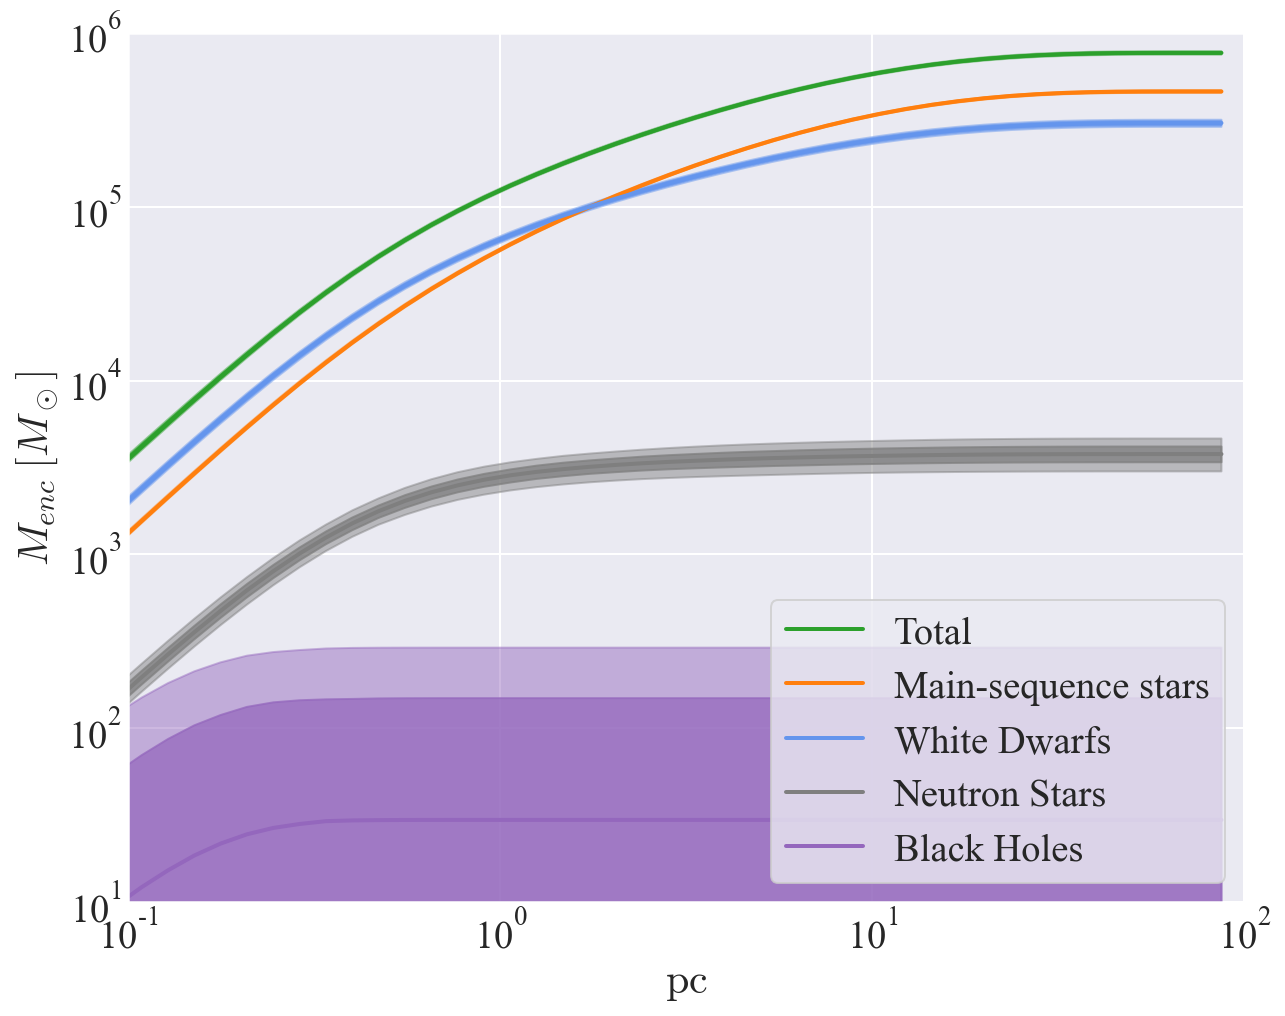

In [39]:
# plot enclosed mass
fig = plt.figure(figsize=(10,8))
civiz.plot_cumulative_mass(fig=fig,)

plt.legend(loc="lower right")
fig.legends = []

plt.xlim(1e-1,1e2)
plt.ylim(1e1,1e6)

fig.savefig('mass_enc.png', bbox_inches='tight', dpi=300)


plt.show()

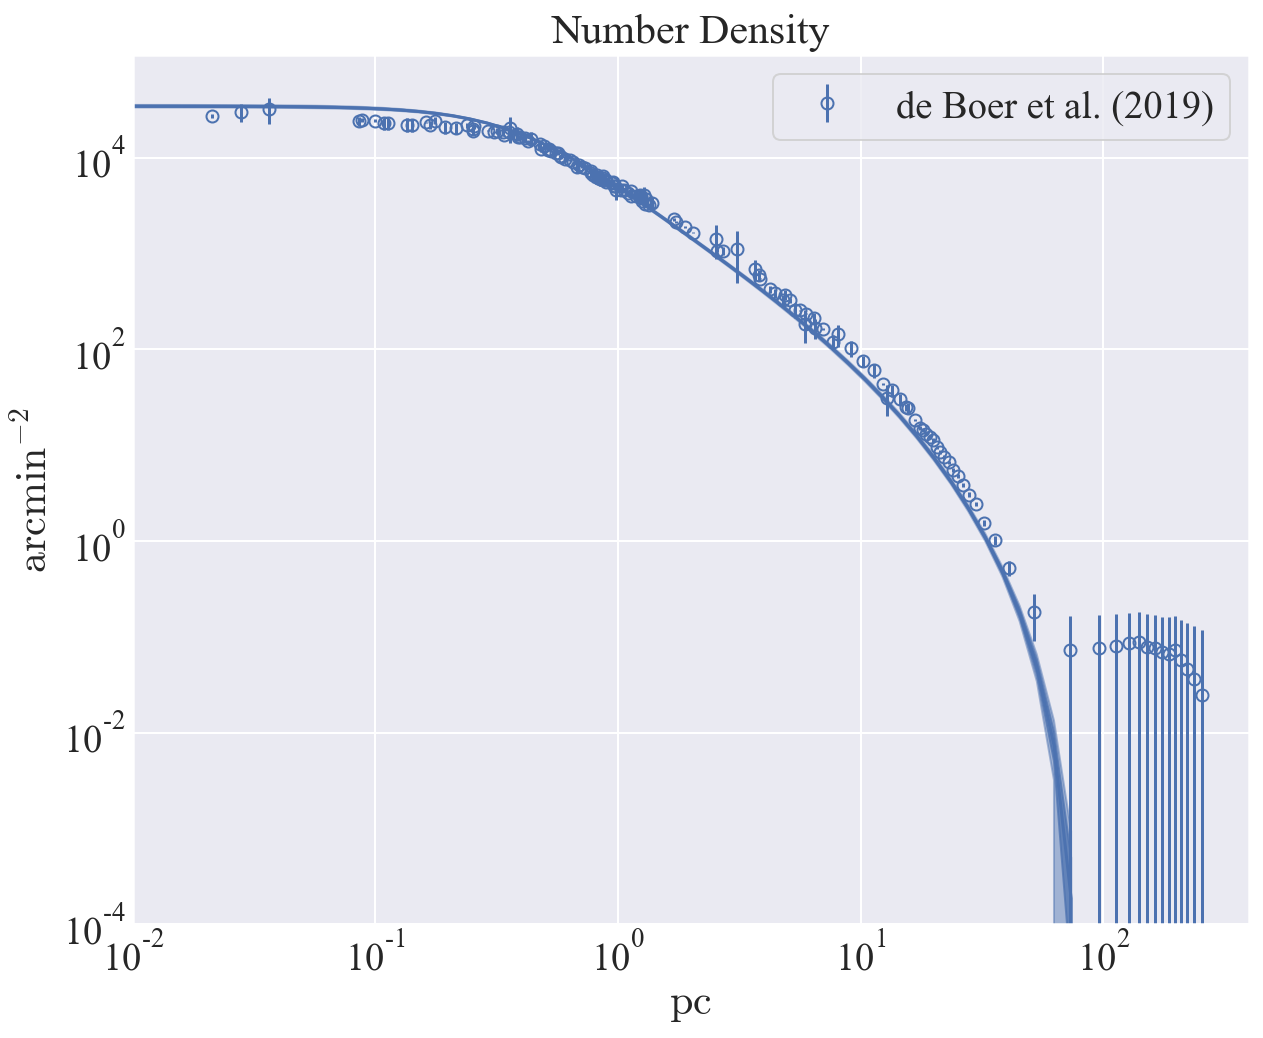

In [40]:
# plot  numdens
fig = plt.figure(figsize=(10,8))
civiz.plot_number_density(fig=fig,)

plt.legend()
fig.legends = []

plt.xlim(1e-2,10**2.6)
# plt.ylim(1e1,1e6)

fig.savefig('numdens.png', bbox_inches='tight', dpi=300)

plt.show()

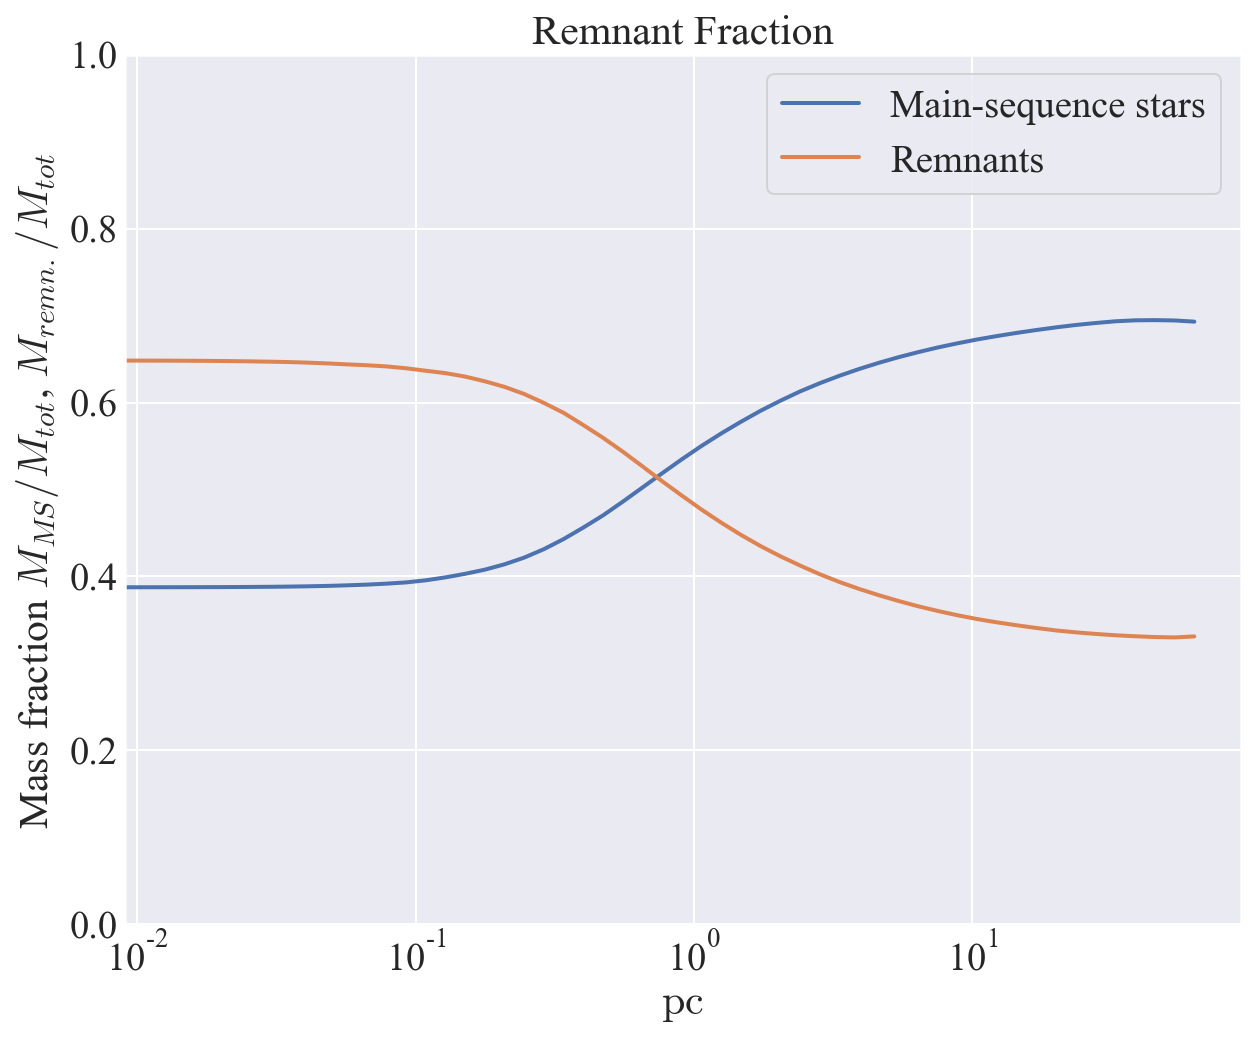

In [41]:
# plot 
fig = plt.figure(figsize=(10,8))
civiz.plot_remnant_fraction(fig=fig,)

plt.legend()
fig.legends = []

fig.savefig('remnant_frac.png', bbox_inches='tight', dpi=300)


plt.show()